# NLP - Sarcasm prediction (Kaggle)

In [19]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:

with open('files/Sarcasm_Headlines_Dataset_1.json','r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

In [17]:
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type='post'
oov_tok="<OOV>"
training_size = 20000
num_epochs = 1

def model_sarcasm(vocab_size,embedding_dim,max_length,training_size,num_epochs=10,trunc_type='post',oov_tok='<OOV>'):
    # Split into training and test set
    training_sentences = sentences[:training_size]
    training_labels = labels[:training_size]
    testing_sentences = sentences[training_size:]
    testing_labels = labels[training_size:]

    # Tokenize and fir on training data
    tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
    tokenizer.fit_on_texts(training_sentences)
    word_index = tokenizer.word_index
    sequences = tokenizer.texts_to_sequences(training_sentences)
    padded = pad_sequences(sequences, maxlen=max_length, truncating=trunc_type)
    # Tokenize on map testing data
    testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
    testing_padded = pad_sequences(testing_sequences, maxlen=max_length)

    training_labels_final = np.array(training_labels)
    testing_labels_final = np.array(testing_labels)

    # Model the neural-net
    model = tf.keras.Sequential([
        tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(6, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the loss function
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                 metrics=['accuracy'])

    model_summary = model.summary()

    history = model.fit(padded, 
              training_labels_final, 
              epochs=num_epochs,
              validation_data=(testing_padded,testing_labels_final)
             )
    return (model_summary, history)


In [74]:
def plot_model(history,num_epochs):
    training_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    training_loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = np.arange(0,num_epochs)

    # Two plots
    fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,6))

    # Plot accuracy
    ax[0].plot(epochs,training_acc,label='training',color='r')
    ax[0].plot(epochs,val_acc,label='validation',color='dodgerblue')
    ax[0].set_title('Model Accuracy')
    ax[0].set_xlabel('epochs')
    ax[0].set_ylabel('accuracy')
    ax[0].legend()

    # Plot loss
    ax[1].plot(epochs,training_loss,label='training',color='r')
    ax[1].plot(epochs,val_loss,label='validation',color='dodgerblue')
    ax[1].set_title('Model Loss')
    ax[1].set_xlabel('epochs')
    ax[1].set_ylabel('loss')
    ax[1].legend()

    plt.show()

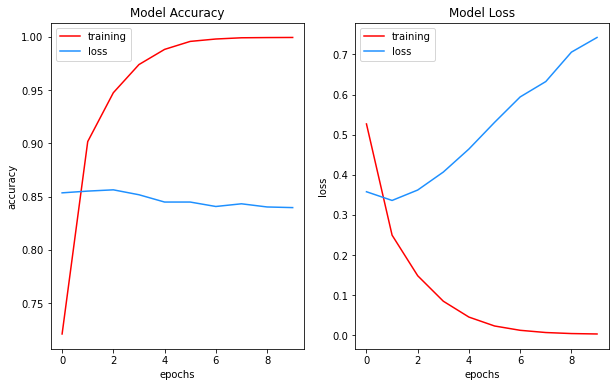

In [72]:
model_summary, history = model_sarcasm(vocab_size=10000,embedding_dim=16,max_length=120,training_size=20000,num_epochs=10)
plot_model(history=history,num_epochs=10)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
flatten_7 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 11526     
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 7         
Total params: 27,533
Trainable params: 27,533
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 11s 18ms/step - loss: 0.5788 - accuracy: 0.6848 - val_loss: 0.4888 - val_accuracy: 0.8140
Epoch 2/10
625/625 [==============================] - 14s 22ms/step - loss: 0.4293 - accuracy: 0.8277 - 

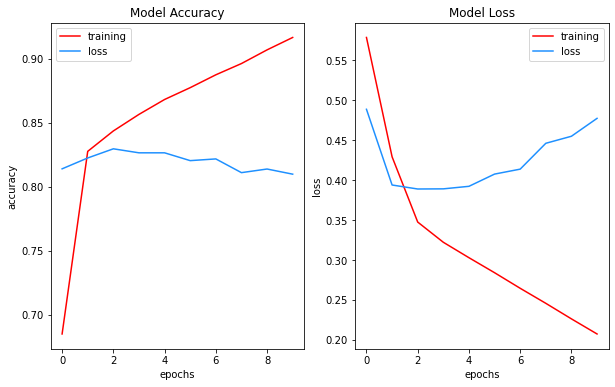

In [73]:
model_summary, history = model_sarcasm(vocab_size=1000,embedding_dim=16,max_length=120,training_size=20000,num_epochs=10)
plot_model(history=history,num_epochs=10)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 120, 16)           12800     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 6)                 11526     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 7         
Total params: 24,333
Trainable params: 24,333
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 11s 18ms/step - loss: 0.5995 - accuracy: 0.6581 - val_loss: 0.5034 - val_accuracy: 0.7904
Epoch 2/10
625/625 [==============================] - 11s 17ms/step - loss: 0.4605 - accuracy: 0.8152 - 

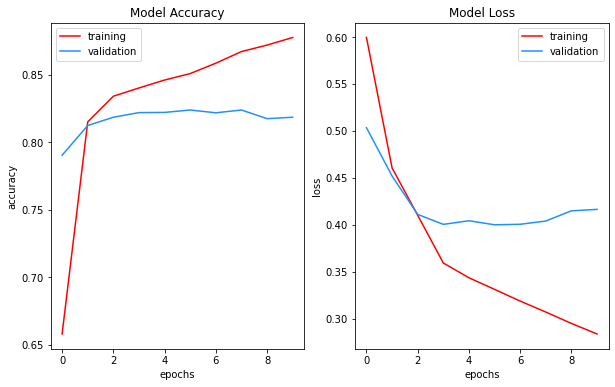

In [75]:
model_summary, history = model_sarcasm(vocab_size=800,embedding_dim=16,max_length=120,training_size=20000,num_epochs=10)
plot_model(history=history,num_epochs=10)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 120, 32)           25600     
_________________________________________________________________
flatten_9 (Flatten)          (None, 3840)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 6)                 23046     
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 7         
Total params: 48,653
Trainable params: 48,653
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 18s 29ms/step - loss: 0.5613 - accuracy: 0.7128 - val_loss: 0.4815 - val_accuracy: 0.7986
Epoch 2/10
625/625 [==============================] - 22s 35ms/step - loss: 0.4361 - accuracy: 0.8263 - 

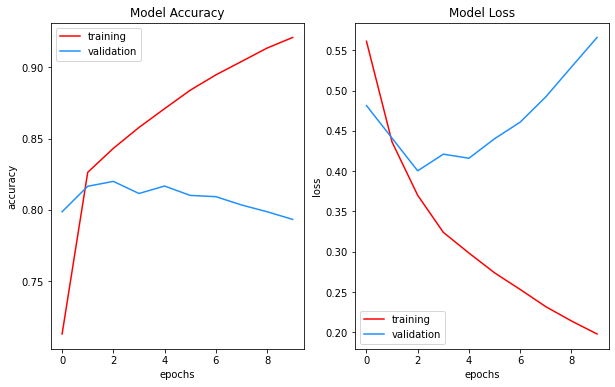

In [76]:
model_summary, history = model_sarcasm(vocab_size=800,embedding_dim=32,max_length=120,training_size=20000,num_epochs=10)
plot_model(history=history,num_epochs=10)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 150, 20)           16000     
_________________________________________________________________
flatten_12 (Flatten)         (None, 3000)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 6)                 18006     
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 7         
Total params: 34,013
Trainable params: 34,013
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 13s 22ms/step - loss: 0.6884 - accuracy: 0.5577 - val_loss: 0.6856 - val_accuracy: 0.5633
Epoch 2/10
625/625 [==============================] - 13s 20ms/step - loss: 0.6860 - accuracy: 0.5603 -

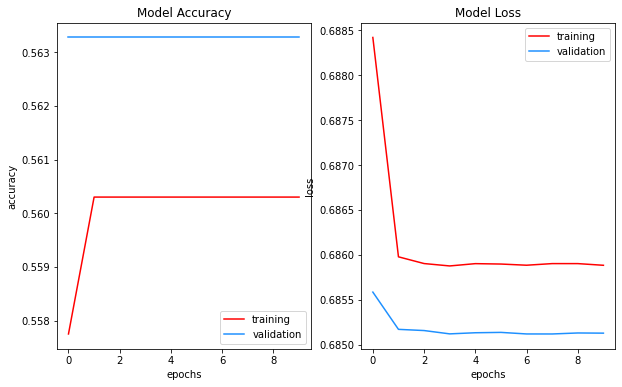

In [79]:
model_summary, history = model_sarcasm(vocab_size=800,embedding_dim=20,max_length=150,training_size=20000,num_epochs=10)
plot_model(history=history,num_epochs=10)